# 📊 YouTube Trending Videos - Exploratory Data Analysis (EDA)

Now that we have a cleaned dataset, we can perform a proper exploratory data analysis (EDA).
In this notebook, we will explore the data, visualize key patterns, and answer relevant questions about YouTube’s trending videos.
We will focus on:

- Views
- Interaction
- Dates and times

**Original dataset :** `USvideos_clean.csv`  
**Author:** Diego Aladrén Mateo

---
## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# Visual configuration
sns.set(style='whitegrid')

---
## First look at the dataset

In [2]:


# Relative path to the clean CSV
clean_csv_path = os.path.join("..", "data", "USvideos_clean.csv")
df = pd.read_csv(clean_csv_path)

# First 5 rows
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour,like_ratio,comment_ratio,tags_list,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17,0.076869,0.021318,['SHANtell martin'],People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",2017-11-13,7,0.040179,0.005252,"['last week tonight trump presidency', '""last ...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19,0.045758,0.002563,"['racist superman', '""rudy""', '""mancuso""', '""k...",Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11,0.029641,0.006253,"['rhett and link', '""gmm""', '""good mythical mo...",Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18,0.063097,0.008359,"['ryan', '""higa""', '""higatv""', '""nigahiga""', '...",Entertainment


In [3]:
# Dimensions
print(df.shape)

# Descriptive statistics
df.describe()


(40949, 22)


,category_id,views,likes,dislikes,comment_count,publish_hour,like_ratio,comment_ratio
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,13.766685,0.034413,0.004453
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,6.424996,0.027009,0.005736
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,10.000000,0.014967,0.001607
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,15.000000,0.028273,0.002961
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,18.000000,0.046751,0.005214
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,23.000000,0.290466,0.117643


With this data, we can see that our dataset consists of 40,949 rows, which means we have that number of videos with 22 columns for each one.

In the table below with statistics, we can omit the data for both the category_id column (doesn't say anything relevant), and the first row in all columns (count), because it is the same in all cases. 
Otherwise, we can see interesting statistics such as that there are approximately 20 times more “Likes” than “Dislikes,” or that the video with the most views has over 200 million. We will go into more detail with all this data later on.

---
## View Metrics Analysis

---
### Distribution of Views

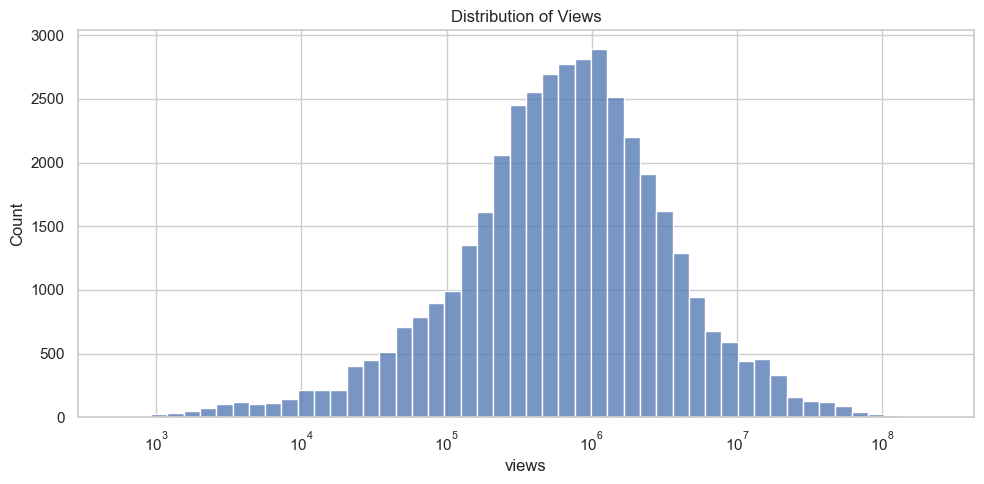

In [4]:
# Histogram of views
plt.figure(figsize=(10,5))
sns.histplot(df['views'], bins=50, log_scale=True)
plt.title("Distribution of Views")
plt.tight_layout()
plt.savefig("../images/view_distribution.png")
plt.show()


The chart shows the number of videos by view range, as can be seen in the image:

- the x-axis (views) is on a logarithmic scale in order to represent the difference in magnitude between the data points.

- The distribution has a shape similar to a bell curve (normal distribution), but because the X-axis is on a logarithmic scale, this suggests that the actual distribution of views follows a log-normal distribution (or something similar such as a truncated power law or gamma distribution).

- The peak (the mode) of the distribution is around $10^6$ (one million views).

In conclusion, although there are a large number of videos that reach around a million views, only a small percentage of videos become massive viral hits, reaching tens or hundreds of millions of views.

---
### Average Views per Category

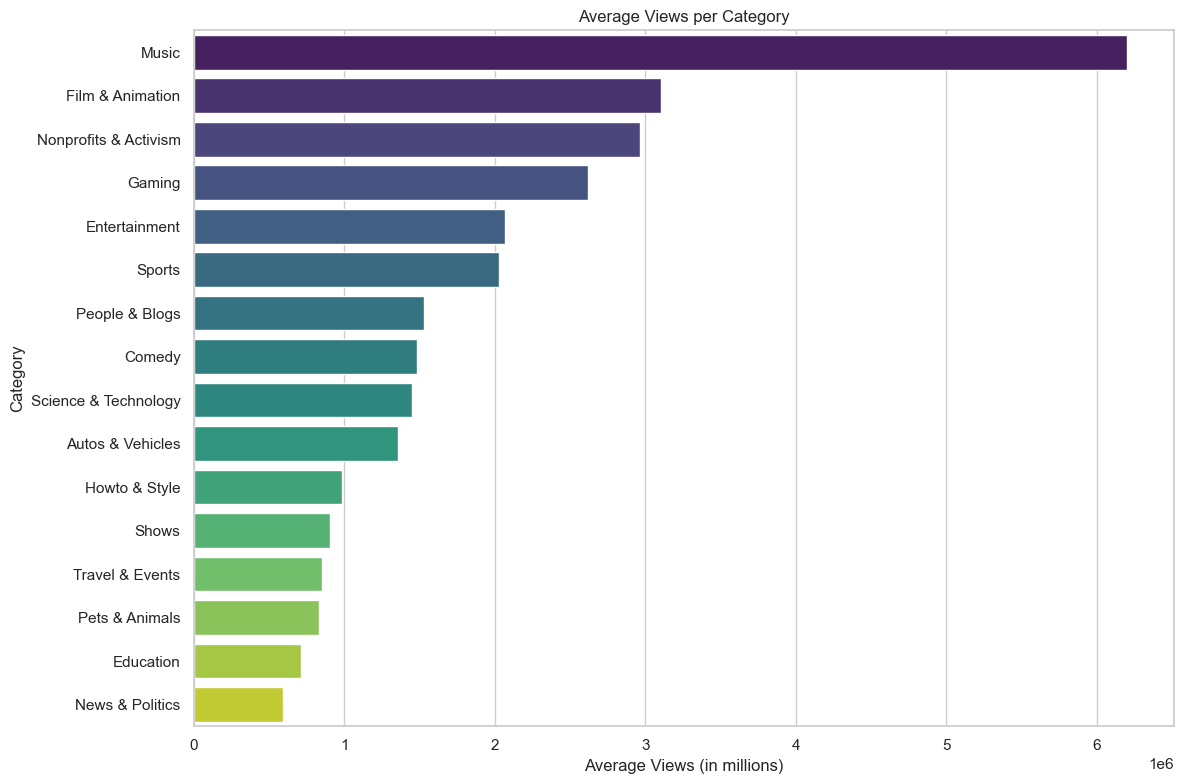

In [5]:
# Calculate the average number of visits per category
views_by_category = (
    df.groupby('category_name')['views']
    .mean()
    .sort_values(ascending=False)
)

# Convert to temporary DataFrame for plotting
plot_df = pd.DataFrame({
    'category': views_by_category.index,
    'avg_views': views_by_category.values
})

# Chart
plt.figure(figsize=(12,8))
sns.barplot(
    x='avg_views',
    y='category',
    data=plot_df,
    palette='viridis',
    hue='category', 
    dodge=False,
    legend=False
)
plt.xlabel("Average Views (in millions)")
plt.ylabel("Category")
plt.title("Average Views per Category")
plt.tight_layout()
plt.savefig("../images/avg_views_per_category.png")
plt.show()


This graph is a horizontal bar chart showing the average number of views per video category. The main conclusions are:

- Music dominates by a wide margin: The Music category has by far the highest average number of views, exceeding 6,000,000 views

- High Production Value Content: The Film & Animation category ranks second in terms of average views (close to 3,000,000). This suggests that content associated with entertainment products with high investment or established distribution tends to accumulate views at a higher average rate.

- Mid-Level Groups: Categories such as Nonprofits & Activism and Gaming, along with Entertainment and Sports, form a second group with significantly lower view averages than Music, but still considerably high (between 2,000,000 and 3,000,000).

- The News & Politics and Education categories have the lowest average number of views: both below 1,000,000, which could indicate that these are more niche topics or that the audience is more distributed among other sources.

Now that we have drawn these conclusions, let's look at the same graph but comparing by median to avoid bias from viral videos in any category.

---
### Median Views per Category

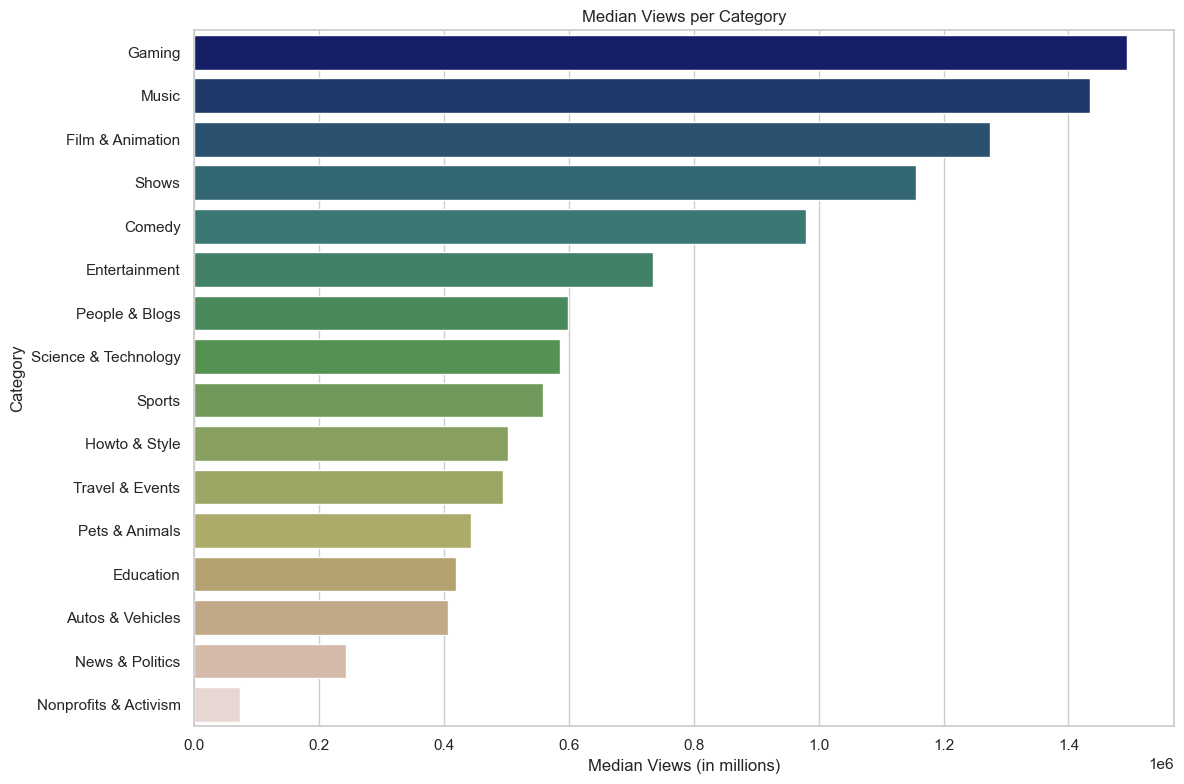

In [6]:
# Calculate the median number of visits per category
views_by_category = (
    df.groupby('category_name')['views']
    .median() 
    .sort_values(ascending=False)
)

# Convert to temporary DataFrame for plotting
plot_df = pd.DataFrame({
    'category': views_by_category.index,
    'median_views': views_by_category.values 
})

# Chart
plt.figure(figsize=(12,8))
sns.barplot(
    x='median_views', 
    y='category',
    data=plot_df,
    palette='gist_earth',
    hue='category', 
    dodge=False,
    legend=False
)
plt.xlabel("Median Views (in millions)") 
plt.ylabel("Category")
plt.title("Median Views per Category") 
plt.tight_layout()
plt.savefig("../images/median_views_per_category.png")
plt.show()


The median reveals that Gaming is the category with the most reliable and highest performance for most of its videos, while the high average for categories such as Music is largely due to a few isolated viral hits. The category with the greatest bias is Nonprofits & Activism, which had one of the highest averages but now has the lowest median. The vast majority of videos in this category have very few views, but the few videos that go viral reach millions, which dramatically raises their average.

---
### Top 5 Categories by Total Views

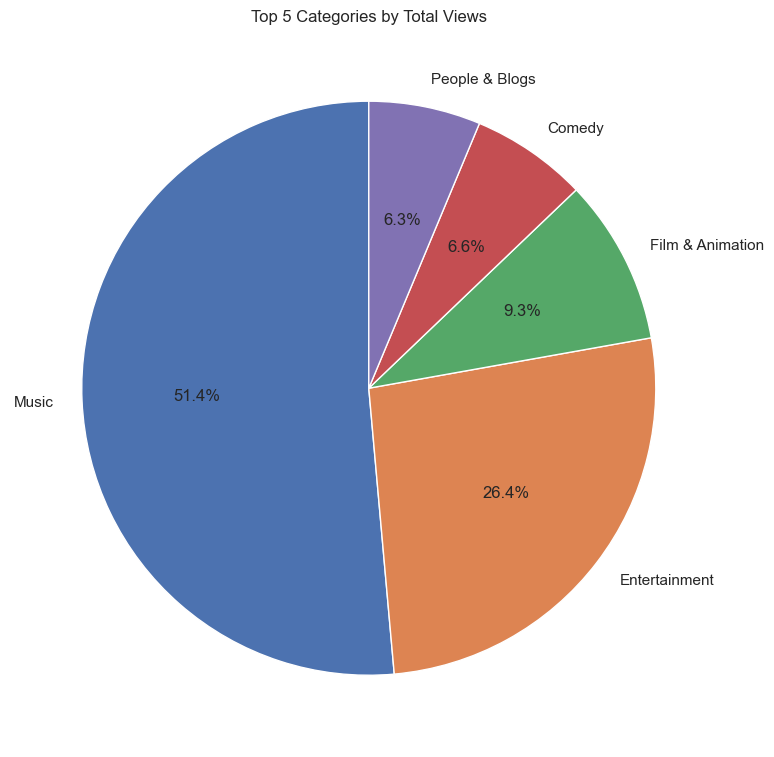

In [7]:

# top 5 total views per category 
views_by_category_sum = (
    df.groupby('category_name', as_index=False)['views']
    .sum()
    .sort_values(by='views', ascending=False)
    .head(5) 
)

# pie grafic
plt.figure(figsize=(8,8))
plt.pie(
    views_by_category_sum['views'], 
    labels=views_by_category_sum['category_name'],
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Top 5 Categories by Total Views')
plt.tight_layout()
plt.savefig("../images/t5_categories_total_views.png")
plt.show()


The pie chart reveals that total YouTube viewership is extremely concentrated in the Music category, it alone accounts for more than half (51.4%) of all views in the five main categories.
Combined, Music and Entertainment account for almost 80% of total views in the top 5, confirming that high production value content with mass appeal (music, films, programmes, etc.) generates the highest volume of traffic.

---
### Top 10 Channels by Total Views

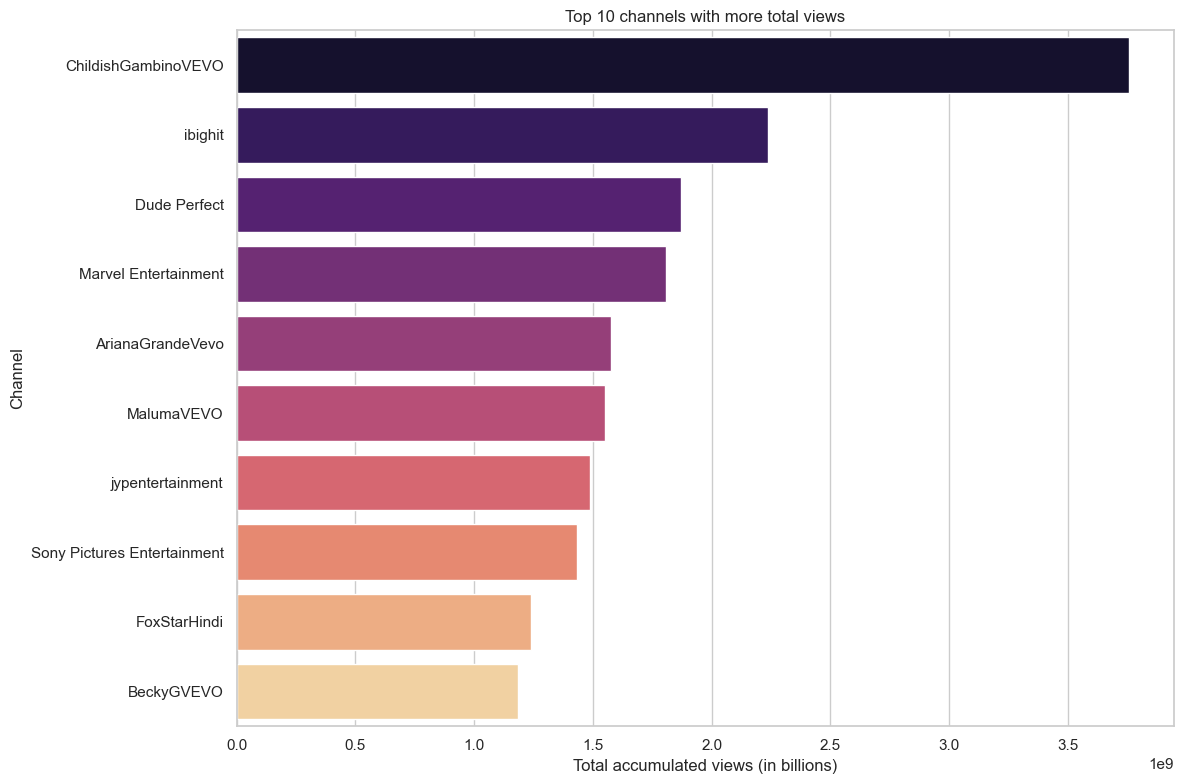

In [8]:
# Total views per channel
top_channels_views = (
    df.groupby('channel_title')['views']
    .sum() 
    .sort_values(ascending=False)
    .head(10) # Top 10
)

# 2. Convert to DataFrame for plotting
plot_df_channels = pd.DataFrame({
    'channel_title': top_channels_views.index,
    'total_views': top_channels_views.values
})

# 3. Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    x='total_views',
    y='channel_title',
    data=plot_df_channels,
    palette='magma',
    hue='channel_title', 
    dodge=False,
    legend=False
)


plt.xlabel("Total accumulated views (in billions)")
plt.ylabel("Channel")
plt.title("Top 10 channels with more total views")
plt.tight_layout()
plt.savefig("../images/t10_channels_total_views.png")
plt.show()


And here you can see the top 10 channels with the highest number of accumulated views in the videos of the dataset.

---
## Interaction Metrics Analysis

---
### Correlation Between Metrics

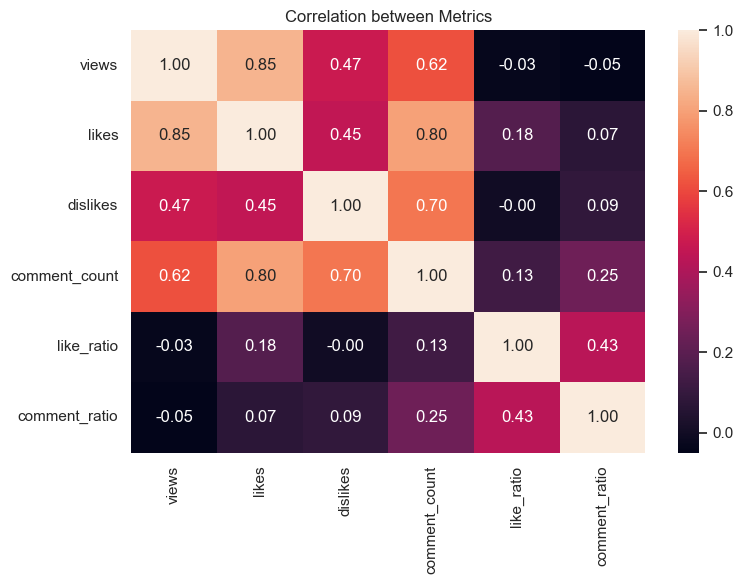

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['views','likes','dislikes','comment_count','like_ratio','comment_ratio']].corr(), annot=True, fmt=".2f")
plt.title("Correlation between Metrics")
plt.tight_layout()
plt.savefig("../images/correlation_metrics.png")
plt.show()


The heatmap shows the correlation between various metrics, such as views, likes, dislikes, comment count, like ratio, and comment ratio. Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).

The correlation analysis reveals strong positive relationships among volume-based metrics such as views, likes, and comment_count. This suggests that popular content (high views) generally attracts a high number of likes and comments. Conversely, ratio-based metrics (like_ratio and comment_ratio) show very weak or negativae correlations with these volume metrics. This implies that the overall success in terms of raw numbers (views, likes) doesn't necessarily dictate the quality of engagement or sentiment (i.e., the percentage of positive reception or audience participation).

---
### Engagement Ratios vs Number of Views

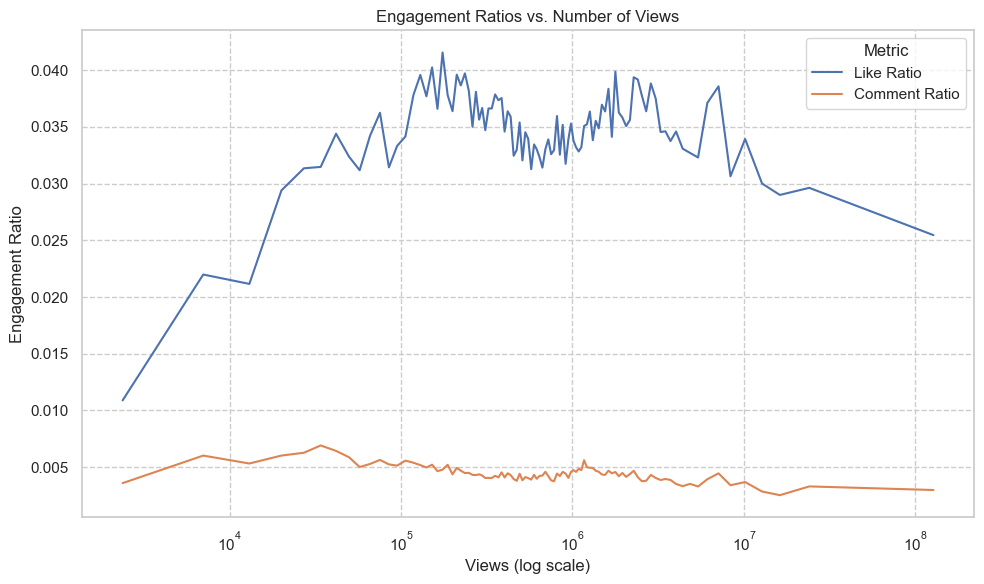

In [10]:
import matplotlib.ticker as ticker

# Group by view ranges (logarithmic for better visual clarity)
df['views_bin'] = pd.qcut(df['views'], q=100, duplicates='drop')

# Calculate the average ratios by view range
ratio_by_views = df.groupby('views_bin', observed=False)[['like_ratio', 'comment_ratio']].mean()

# To plot, we take the midpoint of each range.
ratio_by_views['views_mid'] = ratio_by_views.index.map(lambda x: x.mid)

# chart
plt.figure(figsize=(10,6))
sns.lineplot(data=ratio_by_views, x='views_mid', y='like_ratio', label='Like Ratio')
sns.lineplot(data=ratio_by_views, x='views_mid', y='comment_ratio', label='Comment Ratio')

# Logarithmic scale
plt.xscale('log')

# Customise ticks on the X-axis: 10^4, 10^5, 10^6, 10^7, etc...
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=10))
ax.xaxis.set_major_formatter(ticker.LogFormatterMathtext())

# Labels and aesthetics
plt.xlabel('Views (log scale)')
plt.ylabel('Engagement Ratio')
plt.title('Engagement Ratios vs. Number of Views')
plt.legend(title='Metric')
plt.grid(True, which='major', linestyle='--', alpha=1)
plt.tight_layout()
plt.savefig("../images/engagement_ratios_v_views.png")
plt.show()


The chart shows that the Like Ratio (positive reception) is strongly influenced by the initial view count, rapidly increasing up to $10^5$ views before stabilizing and showing high volatility. For highly viral content (over $10^7$ views), the ratio tends to decline slightly. In contrast, the Comment Ratio (deeper engagement) remains consistently low and flat across all view counts. This suggests that while a video's popularity can boost its relative positive reception (more likes per view), the viewer's likelihood of leaving a comment is relatively unaffected by how viral the content is.

---
### Like Ratio vs Views (Scatter plot)

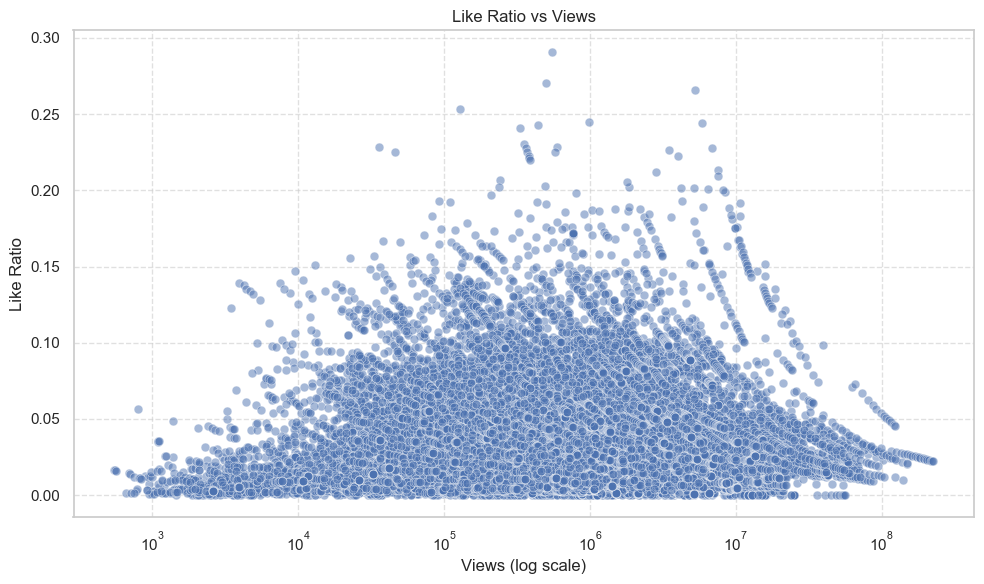

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='views', y='like_ratio', alpha=0.5, s=40)
plt.xscale('log')
plt.title('Like Ratio vs Views')
plt.xlabel('Views (log scale)')
plt.ylabel('Like Ratio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("../images/likeratio_v_views_scatter.png")
plt.show()


In this scatter plot, we can see the same relationship between the likes ratio to views as before. It could be deduced that once a certain number of views has been exceeded, the more massive the success of a video, the more the interaction ratio will decrease.

---
### Top 10 categories by Like Ratio

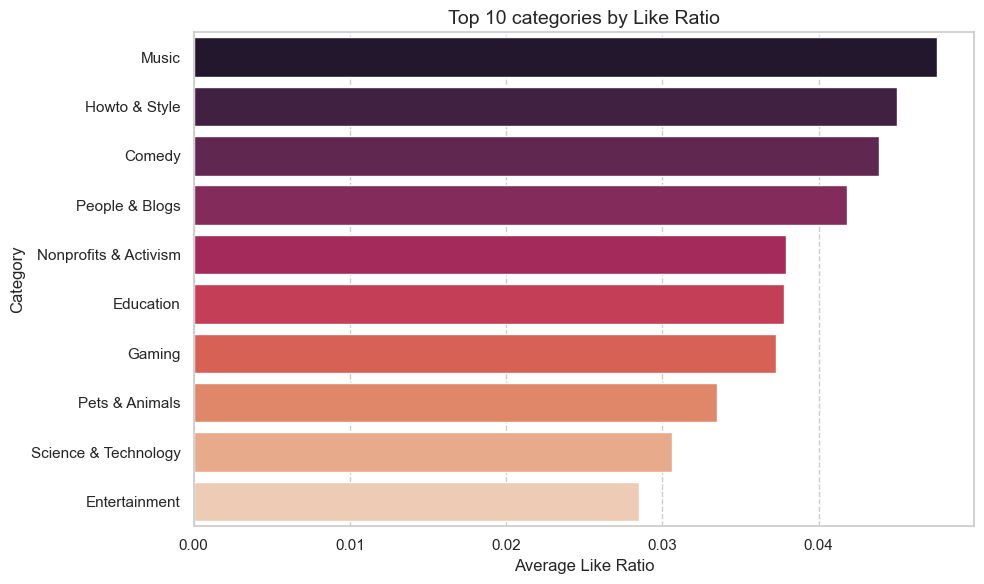

In [12]:

# Group by category and calculate like ratio mean
category_like_ratio = (
    df.groupby('category_name')['like_ratio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=category_like_ratio.values,
    y=category_like_ratio.index,
    palette='rocket',
    hue=category_like_ratio.index
)

plt.title('Top 10 categories by Like Ratio', fontsize=14)
plt.xlabel('Average Like Ratio')
plt.ylabel('Category')
plt.grid(True, axis='x', linestyle='--', alpha=1)
plt.tight_layout()
plt.savefig("../images/t10_categories_like_ratio.png")
plt.show()

The highest average engagement, measured by the Like Ratio, belongs to Music and community-focused/purpose-driven content (like Howto & Style or Nonprofits), while broad-appeal categories like Entertainment and purely informational ones tend to have lower approval rates relative to their views.

Now let's compare it with the comment ratio to see how it changes to show the categories with deeper engagement

---
### Top 10 categories by Comment Ratio

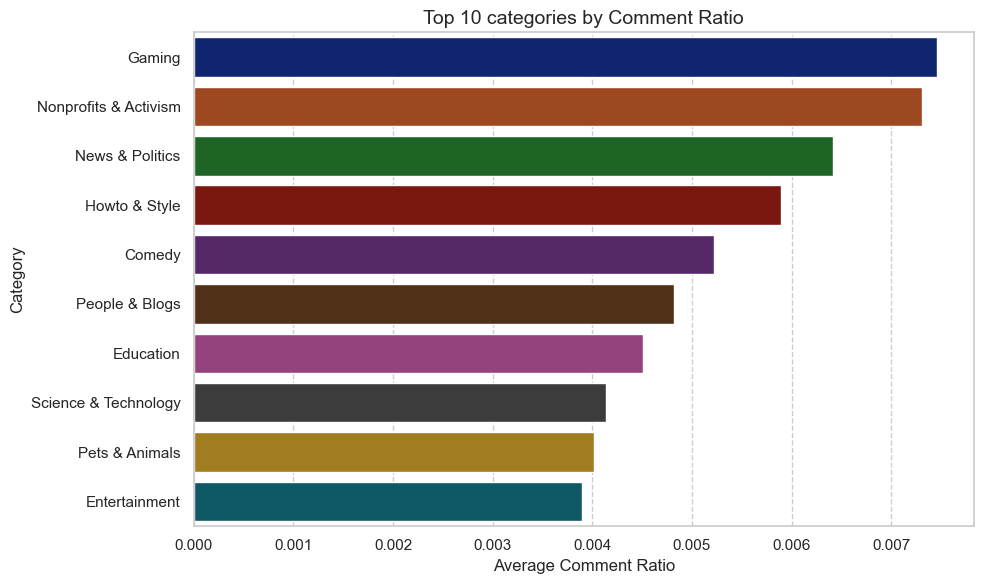

In [13]:

# Group by category and calculate comment ratio mean
category_comment_ratio = (
    df.groupby('category_name')['comment_ratio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=category_comment_ratio.values,
    y=category_comment_ratio.index,
    palette='dark',
    hue=category_comment_ratio.index
)

plt.title('Top 10 categories by Comment Ratio', fontsize=14)
plt.xlabel('Average Comment Ratio')
plt.ylabel('Category')
plt.grid(True, axis='x', linestyle='--', alpha=1)
plt.tight_layout()
plt.savefig("../images/t10_categories_comment_ratio.png")
plt.show()

The Comment Ratio shows that debate, community, and controversy are the main drivers of active interaction, elevating categories such as Gaming, Nonprofits & Activism, and News & Politics, and leaving behind mass/passive consumption categories such as Music (which doesn't even appear in the top 10) and Entertainment.

---
## Date and Time Metrics Analysis

---
### Density of Video Posts Throughout the Day

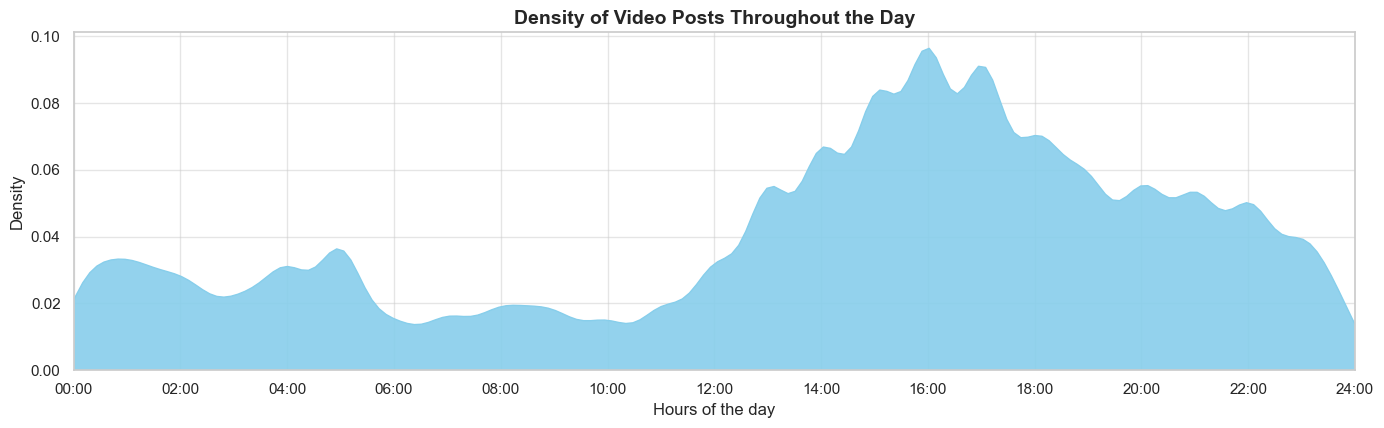

In [14]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
# Extract hour, minute and second for greater accuracy
df['publish_minute'] = df['publish_time'].dt.minute
df['publish_second'] = df['publish_time'].dt.second

# Create a more precise decimal time (hours with fractions)
df['publish_time_decimal'] = (df['publish_hour'] + 
                             df['publish_minute']/60 + 
                             df['publish_second']/3600)

plt.figure(figsize=(14, 8))

# Density chart
plt.subplot(2, 1, 1)
sns.kdeplot(data=df, x='publish_time_decimal', bw_adjust=0.5, fill=True, alpha=0.9, color='skyblue')
plt.title('Density of Video Posts Throughout the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hours of the day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(range(0, 25, 2), [f'{h:02d}:00' for h in range(0, 25, 2)])
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.savefig("../images/density_video_day.png")
plt.show()

The highest density of video posts occurs in the afternoon, reaching a significant peak around 4 PM, with a high frequency that continues until 5-6 PM. This suggests that most content creators prefer to publish their videos in the afternoon, probably because this is the time of day when they get the most views, we will check this later.

After the main peak in the afternoon, the density of posts remains high throughout the night, with a gradual decline.

The period with the lowest density of publications occurs during the early hours of the morning and dawn, specifically between 06:00 and 11:00.

---
### Number of Videos Published per 15-Minute Interval

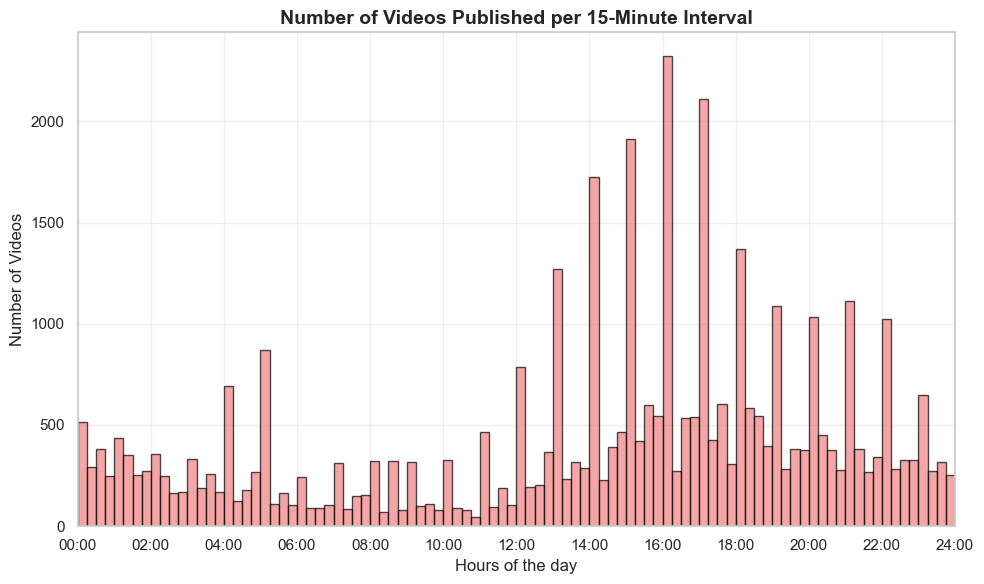

In [15]:
# Histogram with smaller bins (15 minutes)
plt.figure(figsize=(10, 6))
bins_15min = np.arange(0, 24.25, 0.25)  # 15 minutes bins
plt.hist(df['publish_time_decimal'], bins=bins_15min, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Number of Videos Published per 15-Minute Interval', fontsize=14, fontweight='bold')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Videos')
plt.xlim(0, 24)
plt.xticks(range(0, 25, 2), [f'{h:02d}:00' for h in range(0, 25, 2)])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("../images/videos_per_15m_interval.png")
plt.show()

The biggest difference we can see here compared to the previous graph is a significant increase in the interval that includes the hour marks, probably due to the possibility of scheduling a video to be published at a specific time.

---
### Distribution of Publications by Month of the Year

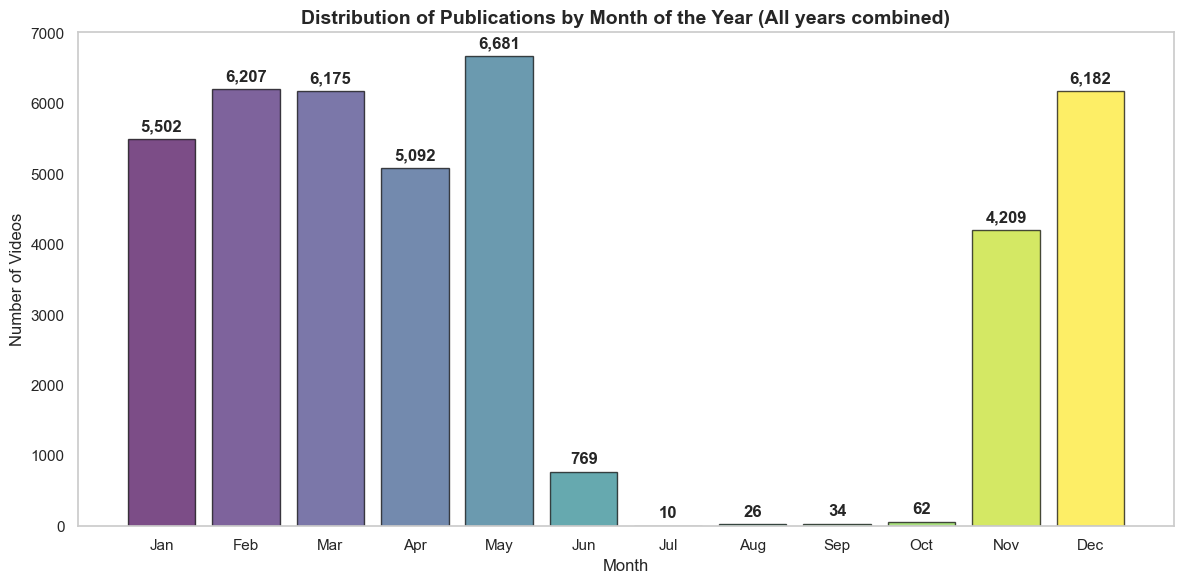

In [16]:
plt.figure(figsize=(12, 6))
df['publish_month'] = df['publish_time'].dt.month

# Group by numerical month (1-12) to see seasonal patterns
videos_per_month_num = df.groupby('publish_month').size()

# Months names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(month_names, videos_per_month_num.values, 
        color=plt.cm.viridis(np.linspace(0, 1, 12)), alpha=0.7, edgecolor='black')

plt.title('Distribution of Publications by Month of the Year (All years combined)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Videos')

# Add values in the bars
for i, v in enumerate(videos_per_month_num.values):
    plt.text(i, v + max(videos_per_month_num.values)*0.01, f'{v:,}', 
             ha='center', va='bottom', fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.savefig("../images/publications_by_month.png")
plt.show()


The most striking conclusion is the almost total absence of data during the summer months:
- June: Sharp drop to 769 publications.
- July, August, September, and October: Publications are insignificant, with figures of 10, 26, 34, and 62, respectively.

In a normal dataset of video posts over the years, one would not expect activity to drop to ten posts in one month (July), especially when other months have more than 5,000 or 6,000.

From this, we can draw two conclusions:
- Either the number of trending videos in summer is much lower than during the rest of the year.
- Or data collection was halted, failed, or was intentionally limited during the period from June to October.

The pattern strongly suggests the second option, given the significant difference.

---
### Distribution of Views by Time of Publication

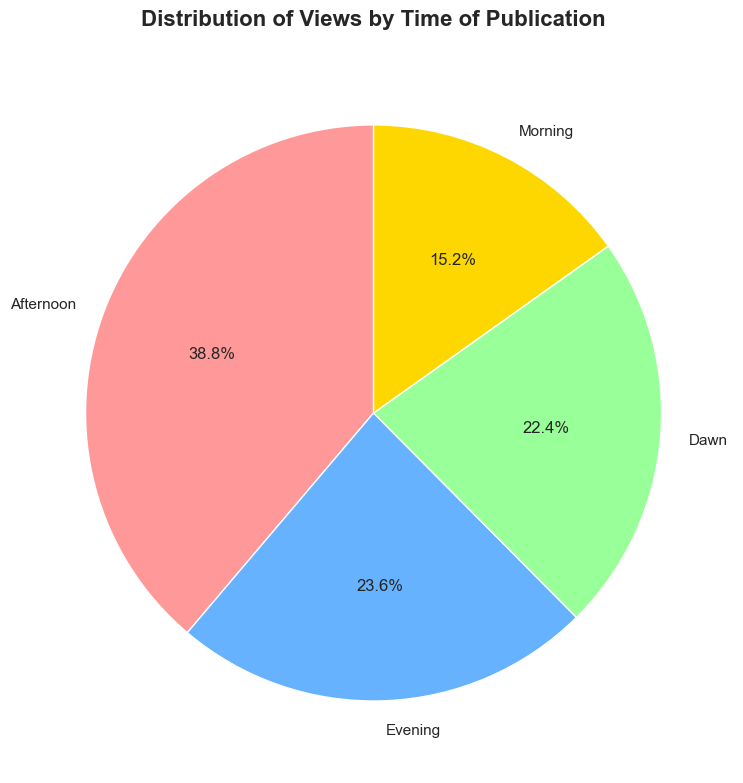

In [17]:
# Define the times of day
def define_time_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Dawn'

# Apply categorization
df['day_moment'] = df['publish_hour'].apply(define_time_day)

# Calculate total views by time of day
view_per_time = df.groupby('day_moment')['views'].sum().sort_values(ascending=False)

# Create pie chart
plt.figure(figsize=(8, 8))

# Colors for each segment
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']

plt.pie(view_per_time.values, 
        labels=view_per_time.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=colors) 

plt.title('Distribution of Views by Time of Publication', 
          fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig("../images/views_by_time_publication.png")
plt.show()

The highest percentage of total views comes from videos posted in the afternoon, with 38.8%, this suggests that posting videos in the afternoon is the most effective time, as these videos collectively generate nearly 40% of all views, significantly outperforming other segments.
If we combine Afternoon (38.8%) with Evening (23.6%), these two time slots account for 62.4% (38.8% + 23.6%) of total views, this reinforces the idea that the audience is more active and watches more videos during the hours after work or school and during the evening.

The Dawn slot, with 22.4%, contributes a considerable number of views, but is below the Afternoon and Evening slots.
Morning is the least effective time to publish, accounting for only 15.2% of total views.

---
## Insights